# Outline

Why this tutorial will be useful:
- This tutorial provides a basic introduction into working with tables
- <font color='green'>You will solely need to change the code at one position marked with ```# <- adapt code here```</font>, however you are encouraged to experiment further

Main purpose of tutorial:
- Ensure that software works

Within this tutorial you will:
- Load gene expression data
- Filter the gene expression data for human brains
- Create a time-resolved clustermap - a table where similar genes will be grouped together, and the gene expression represented by colors

# Loading file
The Python programming language essentially acts as a powerful glue that can stitch different tools together. One tool for working with tables is pandas. In order to use <code>pandas</code> as a tool, we will at first need to <code>import</code> it so that it becomes available to pyhton. Per convention, we give it the name <code>pd</code>

To execute the code contained in the "cell" (grey box) below, press SHIFT and RETURN.

In [1]:
import pandas as pd

<code>pd</code> comes with several functions, which will form specific tasks. To see all of them, click on the <code>pd</code> below and press SHIFT and TAB. 

A useful function, to import tables is <code>.read_csv</code>. Functions take function-specific arguments. To see the required arguments, click onto the function name (e.g.: <code>.rad_csv</code>, and press SHIFT and TAB and TAB (again))

On the next line you will need to adjust the code, to point it toward the location on your computer, which contains "chaperome_expression_rpkm_1_1_orthologs.csv", a file, which you can download from <b>canvas (Class-3-Monday, November 22nd)</b>

In [12]:
my_table = pd.read_csv(
    filepath_or_buffer='C://Users/rogan/Downloads/chaperome_student_course/chaperome_student_course/2020/material/chaperome_developmental_expression_rpkm_1_1_orthologs.csv' # <- adapt code here`
)

What just happened?
- You called pandas, through its name <code>pd</code>, to read the table with expression data.
- The equal sign defines the order in which the code is executed. At first the right side is executed, and the result of this execution is than stored in a "variable" on the left hand side. You could give this variable any variable name, as long as you always use the same name when talking about it within your code. In this case, we give the variable the name <code>my_table</code>

In [13]:
# Let us look at content, using the .head function
# Btw, # marks "comments", which will not be executed
my_table.head()

,Unnamed: 0,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
0,1,Chicken,Brain,e10,AGR2,0.180459,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
1,2,Chicken,Brain,e10,AHSA1,61.075452,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
2,3,Chicken,Brain,e10,ANAPC5,13.196435,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
3,4,Chicken,Brain,e10,APPBP2,23.824029,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
4,5,Chicken,Brain,e10,BAG1,21.463796,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10


Well done! But something appears funny. There is a column called "Unnamed: 0" that apperas to duplicate the "index" (the left most values, which are likely displayed in bold on your computer). Let us <code>drop</code> "Unnamed: 0".

In [14]:
my_table = my_table.drop(
    labels='Unnamed: 0', 
    axis='columns')

Have a look at the data by plotting the first few rows with <code>.head()</code>

In [15]:
my_table.head()

,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
0,Chicken,Brain,e10,AGR2,0.180459,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
1,Chicken,Brain,e10,AHSA1,61.075452,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
2,Chicken,Brain,e10,ANAPC5,13.196435,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
3,Chicken,Brain,e10,APPBP2,23.824029,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
4,Chicken,Brain,e10,BAG1,21.463796,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10


What just happened?
- <code>drop</code> rows or columns
- <code>labels</code> tells <code>drop</code> to look for <code>'Unnamed: 0'</code>
- <code>axis</code> tells <code>drop</code> to look for <code>'Unnamed: 0'</code> within columns (and not the index)
- The equal sign again operates as above. At first the right side is executed, and the result of this execution is than stored in the variable on the left hand side. Since the variable has the same name, <code>table</code> we overwrite its former content (only in the working memory, RAM, of your computer. The original file stays untouched)

# Filtering for human brain

In [16]:
# Let us at first inspect which organisms are present
my_table['organism'].unique()

array(['Chicken', 'Human', 'Mouse', 'Opossum', 'Rabbit', 'Rat', 'Rhesus'],
      dtype=object)

In [17]:
# Which tissues are present?
my_table['tissue'].unique()

array(['Brain', 'Cerebellum', 'Heart', 'Kidney', 'Liver', 'Ovary',
       'Testis'], dtype=object)

In [18]:
# let us define variables that state, which organism and tissue
# we would currently like to investigate (this will later facilitate
# looking at other tissues or organs)
tissue_of_interest = 'Brain'
organism_of_interest = 'Human'

Our aim is to only consider in further analysis only one tissue and organism. We need to **filter** our data. You can think of those **filters** as logical masks. <code>==</code> will make a logical comparison that requires both arguments on each side to be the same. For instance 'cat' == 'cat'  would yield TRUE. Whereas 'cat' == 'dog' would yield false.

In [19]:
is_tissue_of_interest = my_table['tissue'] == tissue_of_interest

In [20]:
is_tissue_of_interest.head()

0    True
1    True
2    True
3    True
4    True
Name: tissue, dtype: bool

In [21]:
is_organism_of_interest = my_table['organism'] == organism_of_interest

In [22]:
is_organism_of_interest.head()

0    False
1    False
2    False
3    False
4    False
Name: organism, dtype: bool

In [ ]:
# Take a short break. When working with data, you should be paranoid. 
# Do is_tissue_of_interest and is_organism_of_interest contain
# the values you would anticipate?

In [23]:
my_table.head()

,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
0,Chicken,Brain,e10,AGR2,0.180459,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
1,Chicken,Brain,e10,AHSA1,61.075452,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
2,Chicken,Brain,e10,ANAPC5,13.196435,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
3,Chicken,Brain,e10,APPBP2,23.824029,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
4,Chicken,Brain,e10,BAG1,21.463796,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10


In [ ]:
# Answer: yes they seem to contain the correct values. The first rows are "Brain" but not "Human"
# Let us continue, and filter

Filters can be combined. To require both values to be TRUE, you can use the AND operator (<code>&</code>). (Question: Why would the <code>==</code> not work?) 



In [24]:
use_these_records = is_tissue_of_interest & is_organism_of_interest

In [25]:
use_these_records.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

To obtain parts of a table, you can use <code>.loc</code>, which provides a view/window to a part of the underlying data (which helps to remember why it is windows-like square brackets that you will need). Left to the <code>,</code> within <code>.loc</code> refers to rows. Right to the <code>,</code> within <code>.loc</code> refers to columns. <code>:</code> means ALL.

In [26]:
my_table.shape

(90831, 13)

In [27]:
filtered_table = my_table.loc[use_these_records, :]

In [28]:
filtered_table.shape

(3014, 13)

In [29]:
filtered_table.head()

,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
8631,Human,Brain,10wpc,AGR2,0.204796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8632,Human,Brain,10wpc,AHSA1,35.900024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,Human,Brain,10wpc,ANAPC5,13.215176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,Human,Brain,10wpc,APPBP2,12.089572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8635,Human,Brain,10wpc,BAG1,7.810598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Arrange for plotting 

Our goal is to make a table where genes are in rows, and different timepoints are in columns. But this is a problem since the table is presently formatted very differently. 

- Data that we need are in three columns: 'gene', 'median_RPKM' (a measure of transcript abundance), and 'age'
- We somehow have to filter for those columns, and place 'gene' in rows, and 'age' in columns, and 'median_RPKM' as the value within the table
- The operation for doing the above is called <code>pivot</code>

In [30]:
filtered_table

,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
8631,Human,Brain,10wpc,AGR2,0.204796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8632,Human,Brain,10wpc,AHSA1,35.900024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,Human,Brain,10wpc,ANAPC5,13.215176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,Human,Brain,10wpc,APPBP2,12.089572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8635,Human,Brain,10wpc,BAG1,7.810598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11640,Human,Brain,youngMidAge,TXNDC11,5.053043,14.0,P63,P112,P186,youngMidAge,P3285,120.0,P155
11641,Human,Brain,youngMidAge,TXNDC5,0.011764,14.0,P63,P112,P186,youngMidAge,P3285,120.0,P155
11642,Human,Brain,youngMidAge,UNC45B,0.080559,14.0,P63,P112,P186,youngMidAge,P3285,120.0,P155
11643,Human,Brain,youngMidAge,URI1,12.527481,14.0,P63,P112,P186,youngMidAge,P3285,120.0,P155


In [31]:
pivotted_table = filtered_table.pivot(
    index='gene',
    columns='age',
    values='median_RPKM'
)

In [32]:
pivotted_table.head()

age,10wpc,11wpc,12wpc,13wpc,16wpc,18wpc,19wpc,20wpc,4wpc,5wpc,...,9wpc,infant,newborn,olderMidAge,school,senior,teenager,toddler,youngAdult,youngMidAge
gene,,,,,,,,,,,,,,,,,,,,,
AGR2,0.204796,0.287413,0.729650,0.147506,0.125068,0.000000,0.011205,0.000000,1.816818,2.032421,...,0.052502,0.041951,0.080742,0.038556,0.050657,0.007748,0.000000,0.000000,0.008981,0.024298
AHSA1,35.900024,42.450277,25.752032,38.350841,37.263479,38.953786,37.166943,32.565175,39.603485,33.717186,...,41.144931,52.799092,55.856249,56.858615,65.435335,71.434443,66.413619,65.532626,56.471002,56.138286
ANAPC5,13.215176,12.791182,15.058916,12.664946,14.117057,13.419554,13.180145,13.720201,12.507366,11.914390,...,11.742623,8.044585,10.978307,13.447578,19.919556,15.818035,12.541668,8.889242,13.028389,12.613188
APPBP2,12.089572,7.629310,12.371811,8.553743,8.719549,6.764985,8.444081,8.429127,8.477734,10.734288,...,7.363476,5.508193,6.189410,7.363501,8.225310,6.036384,6.160756,4.652283,6.443203,6.190867
BAG1,7.810598,10.067833,6.616903,7.719783,6.597957,6.877195,8.144665,6.909606,7.334327,7.294337,...,10.837241,14.535304,10.324836,8.747117,15.221818,14.382736,10.078059,16.259827,10.207200,9.130678


This already looks good. But if you scroll the table to the right, you will notice something funny. The columns are not ordered in a meaningful way. It would appear nicer, if the columns wer ordered by timepoint, going from the earliest time to the latest. Let us at first see, which ages we have.

In [33]:
pivotted_table.columns

Index(['10wpc', '11wpc', '12wpc', '13wpc', '16wpc', '18wpc', '19wpc', '20wpc',
       '4wpc', '5wpc', '7wpc', '8wpc', '9wpc', 'infant', 'newborn',
       'olderMidAge', 'school', 'senior', 'teenager', 'toddler', 'youngAdult',
       'youngMidAge'],
      dtype='object', name='age')

Luckily the above is not too long. We could manually reorder them in a meaningful way.

In [34]:
preferred_order = [
    '4wpc', 
    '5wpc', 
    '7wpc', 
    '8wpc', 
    '9wpc',
    '10wpc', 
    '11wpc', 
    '12wpc', 
    '13wpc', 
    '16wpc', 
    '18wpc', 
    '19wpc', 
    '20wpc',
    'newborn',
    'toddler',
    'infant', 
    'school',
    'teenager',
    'youngAdult',
    'youngMidAge',
    'olderMidAge', 
    'senior']

In [35]:
pivotted_table = pivotted_table.reindex(columns=preferred_order)

In [36]:
pivotted_table.head()

age,4wpc,5wpc,7wpc,8wpc,9wpc,10wpc,11wpc,12wpc,13wpc,16wpc,...,20wpc,newborn,toddler,infant,school,teenager,youngAdult,youngMidAge,olderMidAge,senior
gene,,,,,,,,,,,,,,,,,,,,,
AGR2,1.816818,2.032421,0.044869,0.109435,0.052502,0.204796,0.287413,0.729650,0.147506,0.125068,...,0.000000,0.080742,0.000000,0.041951,0.050657,0.000000,0.008981,0.024298,0.038556,0.007748
AHSA1,39.603485,33.717186,33.953669,32.827180,41.144931,35.900024,42.450277,25.752032,38.350841,37.263479,...,32.565175,55.856249,65.532626,52.799092,65.435335,66.413619,56.471002,56.138286,56.858615,71.434443
ANAPC5,12.507366,11.914390,10.211310,11.585341,11.742623,13.215176,12.791182,15.058916,12.664946,14.117057,...,13.720201,10.978307,8.889242,8.044585,19.919556,12.541668,13.028389,12.613188,13.447578,15.818035
APPBP2,8.477734,10.734288,10.945328,9.300443,7.363476,12.089572,7.629310,12.371811,8.553743,8.719549,...,8.429127,6.189410,4.652283,5.508193,8.225310,6.160756,6.443203,6.190867,7.363501,6.036384
BAG1,7.334327,7.294337,6.778185,7.459887,10.837241,7.810598,10.067833,6.616903,7.719783,6.597957,...,6.909606,10.324836,16.259827,14.535304,15.221818,10.078059,10.207200,9.130678,8.747117,14.382736


# Visualize

In [37]:
# note that the following line is specific to notebooks
# and will not be required on most computers. It serves
# as a safety mechanism to ensure that the figures will
# be shown in this notebook rather than elsewhere on
# your computer
%matplotlib inline

In [38]:
# Seaborn is a powerfull tool for visualizaiton

import seaborn as sns

Let us visualize the data as a <code>clustermap</code>, which pairs similar samples. This is only one of many options of seaborn. For more ideas visit: https://seaborn.pydata.org/examples/index.html

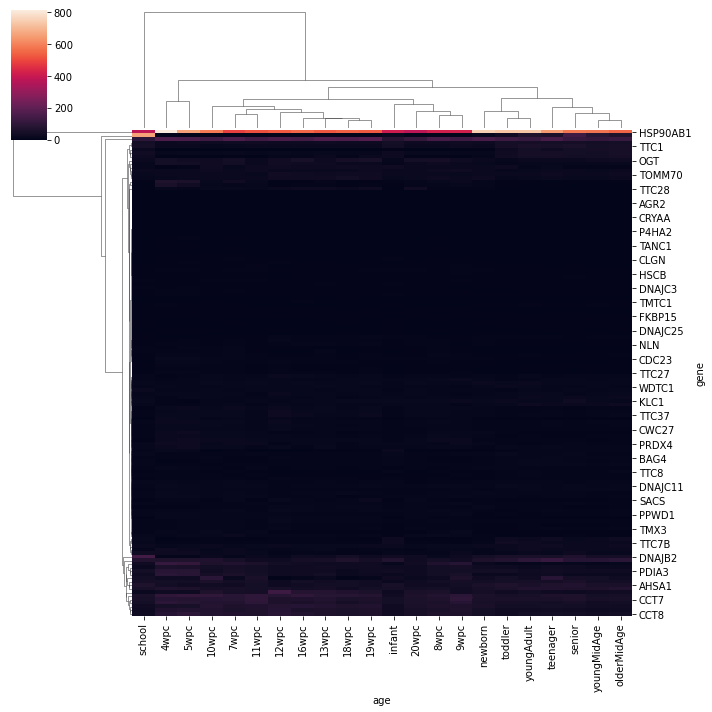

In [39]:
sns.clustermap(
    data=pivotted_table)

# Visualize nicer

The above visualization has a few problems:
- genes are grouped by the absolute number of transcript molecules (RPKM) rather than their change over time
- Columns loose information on time

To make genes with differen expression levels comparable, we need to normalize. One way of normalization is z-scoring (https://en.wikipedia.org/wiki/Standard_score), which normalizes sampels according to mean and median. Let us build a custom function, which can z-score our data. This function will call <code>numpy</code>, a toolbox for mathematical operations

In [40]:
import numpy as np

In [41]:
def zscore(input_values):
    z_scored = (input_values-np.mean(input_values)) / (np.std(input_values))
    return(z_scored)

In [42]:
z_scored_table = pivotted_table.apply(
    func=zscore,
    axis='columns'
)

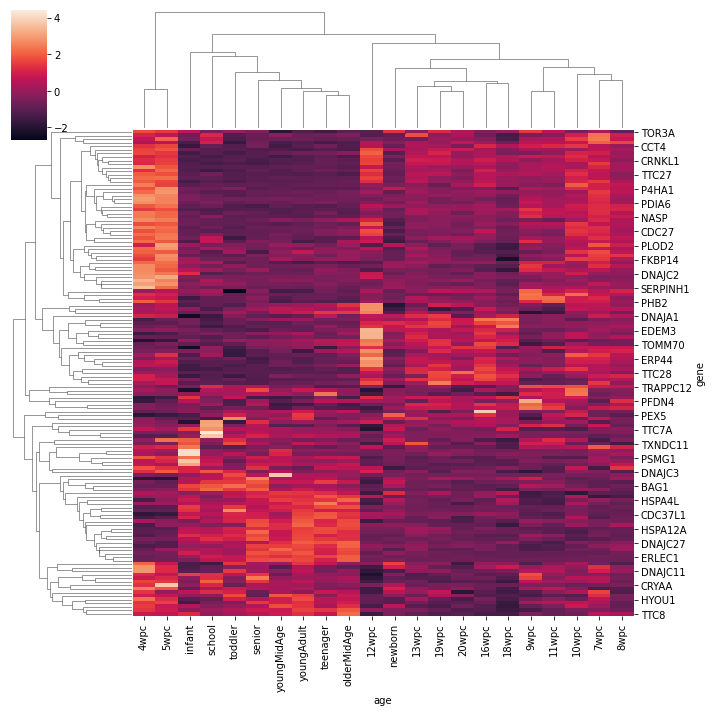

In [43]:
sns.clustermap(
    data=z_scored_table)

Above already looks better, we see patterns emerging. However the colors are not nice. The nicest would be to use a divergent colormap where values close to 0 (those close to the mean of a gene) are white

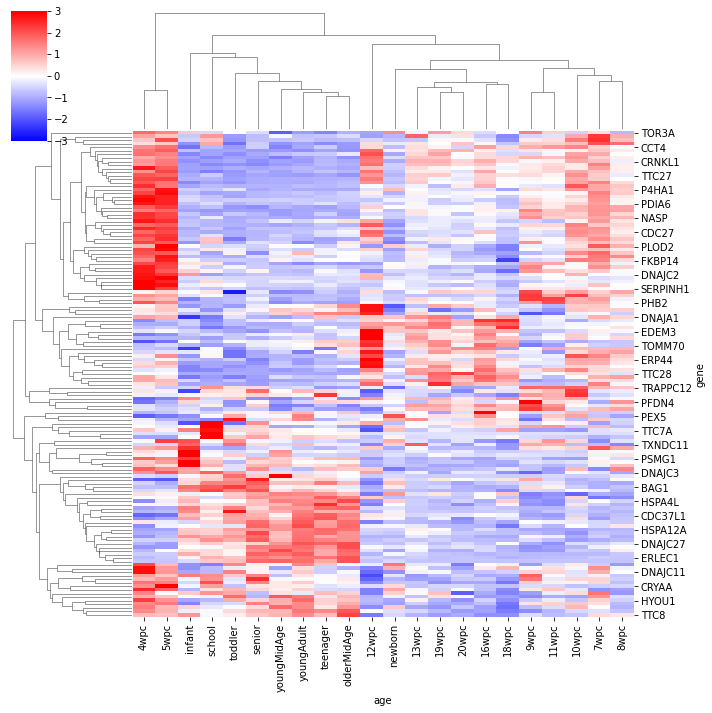

In [44]:
sns.clustermap(
    data=z_scored_table,
    cmap='bwr',   # blue white red colormap
    vmin=-3,      # fix the lowest value that will be covered by the colormap,
    vmax=3,       # fix the highest value that will be covered by the colormap
)

Wow! The looks even better. Now we see clearly, which time points have a reduced (blue) or elevated (red) expression when compared to all other timepoints of the same gene.

Yet there is more that we can do. For instance we can suppress the clustering of the columsn to keep our origianl order (which will correspond to the age).

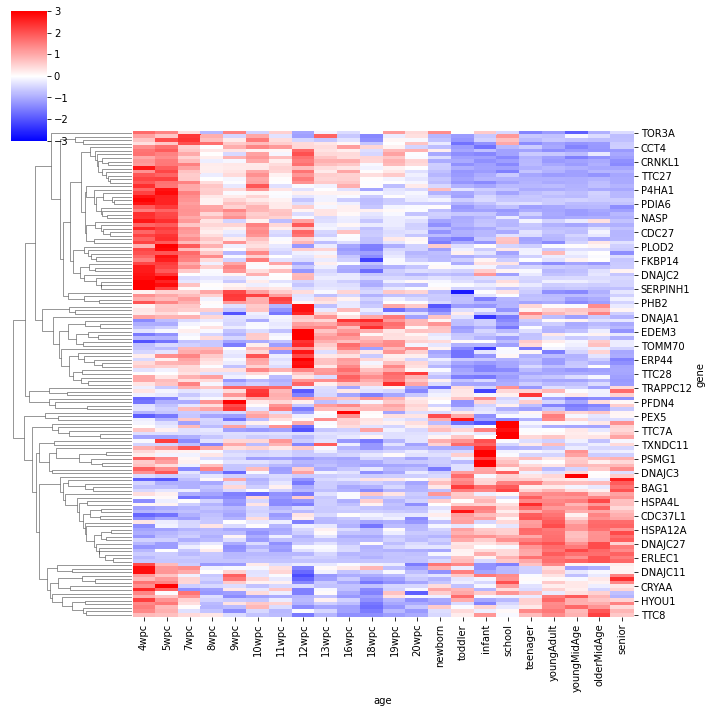

In [45]:
sns.clustermap(
    data=z_scored_table,
    cmap='bwr',   # blue white red colormap
    vmin=-3,      # fix the lowest value that will be covered by the colormap,
    vmax=3,       # fix the highest value that will be covered by the colormap
    col_cluster=False   # Avoid clustering columns
)


# Export as pdf
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['font.family'] = 'Arial'
# plt.savefig('/Users/tstoeger/Desktop/test.pdf', bbox_inches='tight')

# Conclusion

Hopefully this tutorial has served as a brief introduction into computationally working with tables and visualize teh expression of genes. It looks as if some chaperones become downregulated after birth, whereas others become upregulated. Changing the visualization and data normalization can reveal distinct patterns of your data. You are among the first people to know about birth separting two types of regulation of chaperones, and you just discoverd something new!

In [46]:
my_table.head()

,organism,tissue,age,gene,median_RPKM,developmentalIndex,mouseStage,ratStage,rabbitStage,humanStage,rhesusStage,opossumStage,chickenStage
0,Chicken,Brain,e10,AGR2,0.180459,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
1,Chicken,Brain,e10,AHSA1,61.075452,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
2,Chicken,Brain,e10,ANAPC5,13.196435,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
3,Chicken,Brain,e10,APPBP2,23.824029,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10
4,Chicken,Brain,e10,BAG1,21.463796,7.0,e16.5,e19,e21,12wpc,NaN,6.0,e10


# Add time course visualization

In this case want to create a lineplot where the x-axis is chronologic time, and y-axis is raw counts.

In [47]:
x_axis = chronologic_ages = [
    -40*7+7*4, #'4wpc', 
    -40*7+7*4, #'5wpc', 
    -40*7+7*7, #'7wpc', 
    -40*7+7*8, #'8wpc', 
    -40*7+7*9, #'9wpc',
    -40*7+7*10, #'10wpc', 
    -40*7+7*11, #'11wpc', 
    -40*7+7*12, #'12wpc', 
    -40*7+7*13, #'13wpc', 
    -40*7+7*16, #'16wpc', 
    -40*7+7*18, #'18wpc', 
    -40*7+7*19, #'19wpc', 
    -40*7+7*20, #'20wpc',
    0, #'newborn',
    365*2, #'toddler',
    365*5, #'infant', 
    365*10, #'school',
    365*16, #'teenager',
    365*25, #'youngAdult',
    365*35, #'youngMidAge',
    365*50, #'olderMidAge', 
    365*70, #'senior']
]

In [48]:
gene_of_interest = 'CCT4'

In [49]:
pivotted_table.head()

age,4wpc,5wpc,7wpc,8wpc,9wpc,10wpc,11wpc,12wpc,13wpc,16wpc,...,20wpc,newborn,toddler,infant,school,teenager,youngAdult,youngMidAge,olderMidAge,senior
gene,,,,,,,,,,,,,,,,,,,,,
AGR2,1.816818,2.032421,0.044869,0.109435,0.052502,0.204796,0.287413,0.729650,0.147506,0.125068,...,0.000000,0.080742,0.000000,0.041951,0.050657,0.000000,0.008981,0.024298,0.038556,0.007748
AHSA1,39.603485,33.717186,33.953669,32.827180,41.144931,35.900024,42.450277,25.752032,38.350841,37.263479,...,32.565175,55.856249,65.532626,52.799092,65.435335,66.413619,56.471002,56.138286,56.858615,71.434443
ANAPC5,12.507366,11.914390,10.211310,11.585341,11.742623,13.215176,12.791182,15.058916,12.664946,14.117057,...,13.720201,10.978307,8.889242,8.044585,19.919556,12.541668,13.028389,12.613188,13.447578,15.818035
APPBP2,8.477734,10.734288,10.945328,9.300443,7.363476,12.089572,7.629310,12.371811,8.553743,8.719549,...,8.429127,6.189410,4.652283,5.508193,8.225310,6.160756,6.443203,6.190867,7.363501,6.036384
BAG1,7.334327,7.294337,6.778185,7.459887,10.837241,7.810598,10.067833,6.616903,7.719783,6.597957,...,6.909606,10.324836,16.259827,14.535304,15.221818,10.078059,10.207200,9.130678,8.747117,14.382736


In [50]:
y_axis =  pivotted_table.loc[gene_of_interest, :]

In [51]:
# Import another libary for plotting
# This library - in contrast to seaborn - provides access to
# elemental parts of drawing images
import matplotlib.pyplot as plt   

Text(0, 0.5, 'RPKM of CCT4')

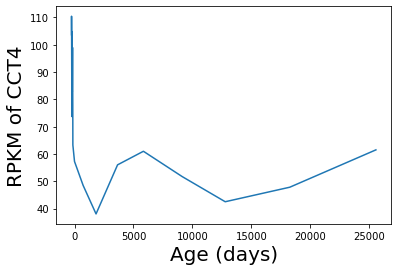

In [52]:
plt.plot(x_axis, y_axis)
plt.xlabel('Age (days)', fontsize=20)
plt.ylabel('RPKM of '+ gene_of_interest, fontsize=20)